In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/HR_comma_sep.csv")
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [9]:
print(df.isnull().sum())
print(df.groupby('left').mean(numeric_only=True))
print(df.groupby('salary').mean(numeric_only=True))

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  
        satisfaction_level  last_evaluation  number_project  \
salary                      

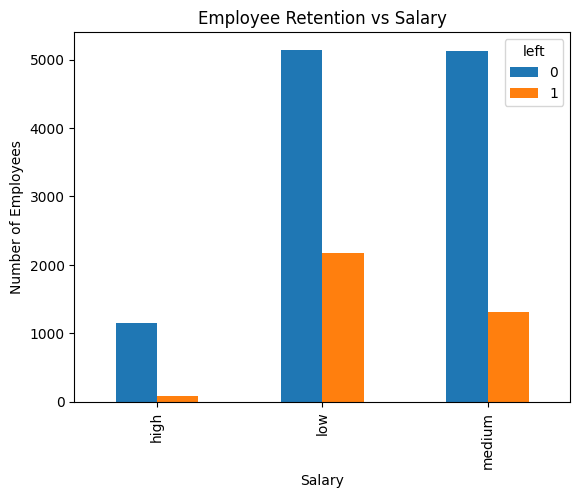

In [6]:
import matplotlib.pyplot as plt
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('Employee Retention vs Salary')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

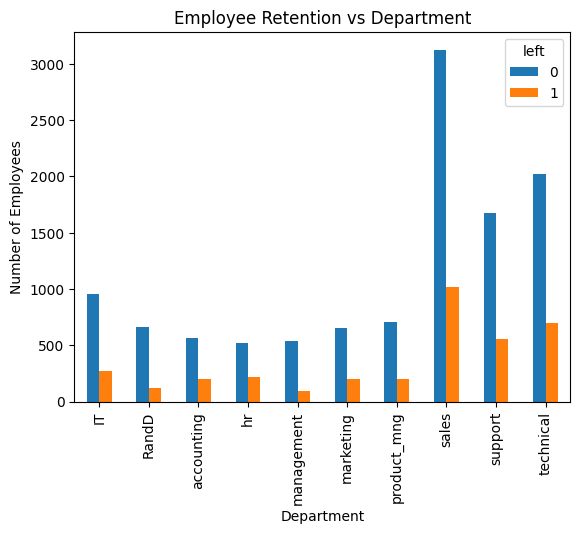

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Employee Retention vs Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [12]:
salary_dummies = pd.get_dummies(df.salary, prefix="salary")
dept_dummies = pd.get_dummies(df.Department, prefix="dept")

df_with_dummies = pd.concat([df, salary_dummies, dept_dummies], axis=1)

df_with_dummies = df_with_dummies.drop(['salary', 'Department'], axis=1)

X_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] + list(salary_dummies.columns) + list(dept_dummies.columns)
X = df_with_dummies[X_features]
y = df_with_dummies.left


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.7922222222222223


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
